# Análisis de Datos de Instacart

## Introducción

Este proyecto tiene como objetivo analizar datos de Instacart, una plataforma de entrega de supermercados, para extraer información sobre los comportamientos de compra de los clientes y los patrones de pedidos. El conjunto de datos contiene información sobre pedidos, productos, departamentos e historial de compras de los clientes.

### Objetivos
- Analizar patrones temporales de pedidos
- Identificar productos más populares y tasas de recompra
- Entender comportamientos de compra de los clientes
- Generar información procesable para el negocio

### Estructura del Proyecto
1. Preparación y Limpieza de Datos
2. Análisis Exploratorio
3. Análisis de Patrones de Compra
4. Conclusiones y Recomendaciones

## Diccionario de datos

Cinco tablas principales componen el conjunto de datos


- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación de Instacart
    - `'order_id'`: es el número de identificación único de cada pedido
    - `'user_id'`: es el número de identificación único de la cuenta de cada cliente
    - `'order_number'`: es el número de veces que el cliente ha realizado un pedido
    - `'order_dow'`: es el día de la semana en que se realizó el pedido (0 es domingo)
    - `'order_hour_of_day'`: es la hora del día en que se realizó el pedido
    - `'days_since_prior_order'`: es el número de días desde que el cliente realizó su pedido anterior

- `products.csv`: cada fila corresponde a un producto único que los clientes pueden comprar
    - `'product_id'`: es el número de identificación único de cada producto
    - `'product_name'`: es el nombre del producto
    - `'aisle_id'`: es el número de identificación único de cada categoría de sección del supermercado
    - `'department_id'`: es el número de identificación único de cada categoría de departamento del supermercado

- `order_products.csv`: cada fila corresponde a un artículo incluido en un pedido
    - `'order_id'`: es el número de identificación único de cada pedido
    - `'product_id'`: es el número de identificación único de cada producto
    - `'add_to_cart_order'`: es la orden secuencial en la que cada artículo fue agregado al carrito
    - `'reordered'`: 0 si el cliente nunca compró el producto antes, 1 si ya lo ha comprado

- `aisles.csv`\n",
    - `'aisle_id'`: es el número de identificación único de cada categoría de sección del supermercado
    - `'aisle'`: es el nombre de la sección

- `departments.csv`
    - `'department_id'`: es el número de identificación único de cada categoría de departamento del supermercado
    - `'department'`: es el nombre del departamento

# Etapa 1: Visión General de los Datos

## Plan de Análisis
1. Importar los datos utilizando pandas
2. Examinar la estructura básica de cada DataFrame
3. Verificar tipos de datos y valores ausentes
4. Identificar posibles problemas en los datos

## Carga de los Datos

In [1]:
# Importar las bibliotecas - Para manipular los datos y crear gráficos
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Cargar los conjuntos de datos en DataFrames - Son 5 DataFrames
df_orders = pd.read_csv("datasets/instacart_orders.csv", sep=';')
df_products = pd.read_csv("datasets/products.csv", sep=';')
df_order_products = pd.read_csv("datasets/order_products.csv", sep=';')
df_aisles = pd.read_csv("datasets/aisles.csv", sep=';')
df_departments = pd.read_csv("datasets/departments.csv", sep=';')

In [3]:
# Examinando la estructura del DataFrame orders
print("\n-----------------------\nEstructura del DataFrame de Pedidos\n")
df_orders.info()
print("\n-----------------------\nPrimeros registros:\n")
print(df_orders.head())


-----------------------
Estructura del DataFrame de Pedidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

-----------------------
Primeros registros:

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516       

### Análisis del DataFrame Orders
- Total de 478,967 registros
- 6 columnas, 5 de tipo entero y 1 de tipo float
- Valores ausentes solo en la columna 'days_since_prior_order' (28,819 registros)
- Cada registro representa un pedido único con información temporal y del cliente

In [4]:
# Examinando la estructura del DataFrame products
print("\n-----------------------\nEstructura del DataFrame de Productos\n")
df_products.info()
print("\n-----------------------\nPrimeros registros:\n")
print(df_products.head())


-----------------------
Estructura del DataFrame de Productos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

-----------------------
Primeros registros:

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   de

### Análisis del DataFrame Products
- 49,694 productos registrados
- 4 columnas: product_id, product_name, aisle_id, department_id
- 1,258 productos sin nombre registrado
- Todos los IDs (producto, sección y departamento) están completos

In [5]:
# Examinando la estructura del DataFrame order_products
print("\n-----------------------\nEstructura del DataFrame de Ítems en Pedidos\n")
df_order_products.info()
print("\n-----------------------\nPrimeros registros:\n")
print(df_order_products.head(20))


-----------------------
Estructura del DataFrame de Ítems en Pedidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

-----------------------
Primeros registros:

    order_id  product_id  add_to_cart_order  reordered
0    2141543       11440               17.0          0
1     567889        1560                1.0          1
2    2261212       26683                1.0          1
3     491251        8670               35.0          1
4    2571142        1940                5.0          1
5    2456893       21616                4.0          1
6     644579       12341                5.0          1
7    2231852       44925               10.0          1
8    3185766       36259        

### Análisis del DataFrame Order_Products
- 4,545,007 registros de ítems en pedidos
- 4 columnas: order_id, product_id, add_to_cart_order, reordered
- 836 valores ausentes en la columna add_to_cart_order
- Cada fila representa un ítem específico en un pedido

In [6]:
# Examinando la estructura del DataFrame aisles
print("\n-----------------------\nEstructura del DataFrame de Secciones\n")
df_aisles.info()
print("\n-----------------------\nPrimeros registros:\n")
print(df_aisles.head())


-----------------------
Estructura del DataFrame de Secciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

-----------------------
Primeros registros:

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


### Análisis del DataFrame Aisles
- 134 secciones registradas
- Datos completos, sin valores ausentes
- Estructura simple con ID y nombre de la sección

In [7]:
# Examinando la estructura del DataFrame departments
print("\n-----------------------\nEstructura del DataFrame de Departamentos\n")
df_departments.info()
print("\n-----------------------\nPrimeros registros:\n")
print(df_departments.head())


-----------------------
Estructura del DataFrame de Departamentos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

-----------------------
Primeros registros:

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


### Análisis del DataFrame Departments
- 21 departamentos registrados
- Datos completos, sin valores ausentes
- Estructura simple con ID y nombre del departamento

## Conclusiones del Análisis Inicial
1. **Integridad de los Datos**
   - Estructura relacional bien definida entre las tablas
   - Valores ausentes concentrados en columnas específicas
   - Sistema de IDs consistente entre las tablas

2. **Puntos de Atención**
   - Necesario tratar valores ausentes en 'days_since_prior_order'
   - Investigar los productos sin nombre
   - Analizar los valores ausentes en 'add_to_cart_order'

# Etapa 2: Preparación de Datos

## Plan de Procesamiento
1. Verificar y tratar valores duplicados
2. Identificar y tratar valores ausentes
3. Validar tipos de datos

### DataFrame `orders`

In [8]:
# Verificación de duplicados en el DataFrame orders
print('Número de valores duplicados:', df_orders.duplicated().sum())
print('\nRegistros duplicados:')
print(df_orders[df_orders.duplicated()])

Número de valores duplicados: 15

Registros duplicados:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  

### Conclusiones:

Se encontraron filas duplicadas y en todas ellas los pedidos fueron realizados a las 2 de la mañana los miércoles, lo que se puede observar en la columna 'order_hour_of_day' y en la columna 'order_dow', donde '0' representa el domingo y los demás días siguen en orden.


In [9]:
# Análisis detallado de los pedidos a las 2 de la mañana
print('Cantidad de pedidos a las 2h:')
print(df_orders[df_orders['order_hour_of_day'] == 2].count())
print('\nDistribución de pedidos a las 2h:')
print(df_orders[df_orders['order_hour_of_day'] == 2].value_counts())

Cantidad de pedidos a las 2h:
order_id                  1004
user_id                   1004
order_number              1004
order_dow                 1004
order_hour_of_day         1004
days_since_prior_order     941
dtype: int64

Distribución de pedidos a las 2h:
order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1919531   191501   32            3          2                  7.0                       2
467134    63189    21            3          2                  2.0                       2
1918001   188546   14            3          2                  16.0                      2
2282673   86751    49            3          2                  2.0                       2
1021560   53767    3             3          2                  9.0                       2
                                                                                        ..
1198786   183503   16            1          2                  6.0                       1
1203051   329

### Análisis de Duplicados - DataFrame Orders

¿Qué significa este resultado?

No hay información suficiente para determinar la causa del problema, pero se necesita investigar por qué las duplicaciones ocurren los miércoles. No podemos asumir que se trata de un ataque o un error puntual porque, aunque las duplicaciones ocurrieron los miércoles, sucedieron en diferentes fechas (según la columna 'days_since_prior_order'). Se recomienda preguntar a la empresa si hay algún proceso electrónico en este período cada miércoles, como una sincronización con la base de datos u otro proceso que pueda causar el error.

In [10]:
# Eliminación de duplicados del DataFrame orders
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

# Verificación posterior a la eliminación
print('Número de duplicados después del tratamiento:', df_orders.duplicated().sum())

Número de duplicados después del tratamiento: 0


### Conclusiones:

Había pocos pedidos duplicados, lo que puede ocurrir por diversas razones. Se sospecha que puede haber un problema de actualización en la base de datos que sigue un calendario que afecta este horario (dos de la mañana) los miércoles. Los datos fueron tratados y el índice fue reiniciado según las mejores prácticas de este proceso.

### DataFrame `products`

In [11]:
# Verificación de duplicados en el DataFrame products
print('Número de duplicados en products:', df_products.duplicated().sum())
print('\nVerificación por departamento:')
print(df_products[df_products['department_id'].duplicated()].groupby('department_id')['department_id'].count())

Número de duplicados en products: 0

Verificación por departamento:
department_id
1     4007
2      547
3     1515
4     1683
5     1053
6     1138
7     4365
8      971
9     1857
10      37
11    6563
12     906
13    5371
14    1116
15    2091
16    3448
17    3084
18    1080
19    6263
20    1321
21    1257
Name: department_id, dtype: int64


### Análisis de Duplicados - DataFrame Products
- No hay registros completamente duplicados.
- Es esperable encontrar duplicados en department_id (productos diferentes en el mismo departamento).
- Los nombres de los productos fueron convertidos a minúsculas para estandarización.

### DataFrame `departments`

In [12]:
# Verificación de duplicados en el DataFrame departments
print('Número de duplicados en departments:', df_departments.duplicated().sum())
print('\nRegistros duplicados:')
print(df_departments[df_departments.duplicated()])

Número de duplicados en departments: 0

Registros duplicados:
Empty DataFrame
Columns: [department_id, department]
Index: []


In [13]:
# Análisis detallado de los IDs
print('\nVerificación de IDs únicos:')
print(df_departments['department_id'].unique())
print('\nTotal de departamentos únicos:', df_departments['department_id'].nunique())


Verificación de IDs únicos:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

Total de departamentos únicos: 21


### Análisis de Duplicados - DataFrame Departments
- No se identificaron duplicados.
- 21 departamentos únicos.
- Los IDs están bien estructurados y secuenciales (1-21).

### DataFrame `aisles`

In [14]:
# Verificación de duplicados en el DataFrame aisles
print('Número de duplicados en aisles:', df_aisles.duplicated().sum())
print('\nRegistros duplicados:')
print(df_aisles[df_aisles.duplicated()])

Número de duplicados en aisles: 0

Registros duplicados:
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [15]:
# Análisis de IDs únicos
print('\nTotal de secciones únicas:', df_aisles['aisle_id'].nunique())


Total de secciones únicas: 134


### Análisis de Duplicados - DataFrame Aisles
- No se identificaron duplicados.
- 134 secciones únicas.
- Estructura de datos íntegra.

### DataFrame `order_products`

In [16]:
# Verificación de duplicados en el DataFrame order_products
print('Número de duplicados en order_products:', df_order_products.duplicated().sum())
print('\nRegistros duplicados:')
print(df_order_products[df_order_products.duplicated(subset=['order_id','product_id'])])

Número de duplicados en order_products: 0

Registros duplicados:
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [17]:
# Análisis de valores únicos
print('\nAnálisis de IDs de pedidos:')
print('Valores únicos:', df_order_products['order_id'].unique())
print('\nTotal de pedidos únicos:', df_order_products['order_id'].nunique())

print('\nAnálisis de IDs de productos:')
print('Valores únicos:', df_order_products['product_id'].unique())
print('\nTotal de productos únicos:', df_order_products['product_id'].nunique())


Análisis de IDs de pedidos:
Valores únicos: [2141543  567889 2261212 ...  812418 2666881 1461911]

Total de pedidos únicos: 450046

Análisis de IDs de productos:
Valores únicos: [11440  1560 26683 ... 49153  8182 40024]

Total de productos únicos: 45573


### Análisis de Duplicados - DataFrame Order_Products
- No se identificaron duplicados directos.
- 450,046 pedidos únicos.
- 45,573 productos únicos en pedidos.
- La situación es compleja debido a la naturaleza de los datos:
  - Un pedido puede contener varios productos.
  - Un producto puede aparecer en múltiples pedidos.
  - Las combinaciones repetidas order_id/product_id son importantes para el análisis de recompra.

## Encontrar y eliminar valores ausentes

Se identificaron valores ausentes en las siguientes columnas:
- Columna `'product_name'` en la tabla `products`
- Columna `'days_since_prior_order'` en la tabla `orders`
- Columna `'add_to_cart_order'` en la tabla `order_products`

### DataFrame `products`

In [18]:
# Análisis de valores ausentes en el DataFrame products
print('Verificando valores ausentes en el DataFrame products:')
print(df_products.isna().sum())

print('\nVerificando valores ausentes en la columna "product_name":')
print(df_products['product_name'].isna().sum())

Verificando valores ausentes en el DataFrame products:
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Verificando valores ausentes en la columna "product_name":
1258


### Análisis de Valores Ausentes - DataFrame Products
- 1,258 productos sin nombre registrado.
- Todas las demás columnas están completamente llenas.

In [19]:
# Verificación de productos sin nombre por sección
seccion_productos_sin_nombre = df_products.loc[df_products['product_name'].isna(), 'aisle_id']
print(seccion_productos_sin_nombre)

37       100
71       100
109      100
296      100
416      100
        ... 
49552    100
49574    100
49640    100
49663    100
49668    100
Name: aisle_id, Length: 1258, dtype: int64


In [20]:
# Verificación de productos sin nombre por departamento
departamento_productos_sin_nombre = df_products.loc[df_products['product_name'].isna(), 'department_id']
print(departamento_productos_sin_nombre)

37       21
71       21
109      21
296      21
416      21
         ..
49552    21
49574    21
49640    21
49663    21
49668    21
Name: department_id, Length: 1258, dtype: int64


In [21]:
# Verificación de las secciones y departamentos afectados
print('Tabla de departamentos')
print(df_departments[df_departments['department_id'] == 21])

print('\nTabla de secciones')
print(df_aisles[df_aisles['aisle_id'] == 100])

# Tratamiento de valores ausentes
df_departments['department'] = df_departments['department'].replace('missing', np.nan).fillna('Unknown')
df_aisles['aisle'] = df_aisles['aisle'].fillna('Unknown')


Tabla de departamentos
    department_id department
20             21    missing

Tabla de secciones
    aisle_id    aisle
99       100  missing


### Conclusiones sobre Valores Ausentes en el DataFrame Products
- Los valores ausentes están concentrados en la sección 100 y el departamento 21.
- La sección y el departamento fueron marcados como "Unknown" después del tratamiento.
- El patrón sistemático sugiere un posible problema de integración de datos.

### DataFrame `orders`

In [22]:
# Análisis de valores ausentes en el DataFrame orders
print('Verificando valores ausentes en el DataFrame orders:')
print(df_orders.isna().sum())

Verificando valores ausentes en el DataFrame orders:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [23]:
# Verificación de valores ausentes en pedidos no iniciales
pedido_sin_cliente = df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] > 1)]
print('Pedidos no iniciales con valores ausentes:')
print(pedido_sin_cliente)

Pedidos no iniciales con valores ausentes:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### Análisis de Valores Ausentes - DataFrame Orders
- 28,817 valores ausentes en `'days_since_prior_order'`.
- Los valores ausentes solo aparecen en los primeros pedidos.
- Este comportamiento es esperado, ya que no hay un pedido anterior para la primera compra.

### DataFrame `order_products`

In [24]:
# Análisis de valores ausentes en el DataFrame order_products
print('Verificando valores ausentes en el DataFrame order_products:')
print(df_order_products.isna().sum())

Verificando valores ausentes en el DataFrame order_products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [25]:
# Análisis de los valores en la columna add_to_cart_order
print('Valores mínimos de la columna "add_to_cart_order":')
print(df_order_products['add_to_cart_order'].min())

print('\nValores máximos de la columna "add_to_cart_order":')
print(df_order_products['add_to_cart_order'].max())


Valores mínimos de la columna "add_to_cart_order":
1.0

Valores máximos de la columna "add_to_cart_order":
64.0


In [26]:
# Verificación de productos con orden de adición ausente
ids_valores_ausentes = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), 'product_id']
print('Productos con orden de adición ausente:')
print(ids_valores_ausentes)

# Tratamiento de valores ausentes
df_order_products.fillna({'add_to_cart_order': 999}, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

Productos con orden de adición ausente:
737         5068
9926       43867
14394      11688
16418       4142
30114      42828
           ...  
4505662     7411
4511400      260
4517562     9517
4534112    17835
4535739    17949
Name: product_id, Length: 836, dtype: int64


### Análisis de Valores Ausentes - DataFrame Order_Products
- 836 valores ausentes en `'add_to_cart_order'`.
- El orden de adición varía de 1 a 64 productos por pedido.
- Los valores ausentes fueron reemplazados por 999 para identificarlos en futuros análisis.

## Conclusiones Generales del Tratamiento de Datos

1. **Valores Ausentes**
   - Se identificaron y trataron en tres DataFrames principales.
   - Se aplicaron tratamientos específicos para cada caso.
   - Se mantuvo la trazabilidad de los datos tratados.

2. **Impacto en el Análisis**
   - Los datos mantienen coherencia para futuros análisis.
   - Los tratamientos no comprometen la integridad de las relaciones entre tablas.
   - Se eligieron valores sustitutos para facilitar la identificación de datos tratados.

# Etapa 3: Análisis de Datos

## A. Análisis Básico

### 1. Verificación de valores en las columnas temporales

In [27]:
# Verificación de valores en order_hour_of_day
print('Valor mínimo de la columna "order_hour_of_day":', df_orders['order_hour_of_day'].min())
print('Valor máximo de la columna "order_hour_of_day":', df_orders['order_hour_of_day'].max())

Valor mínimo de la columna "order_hour_of_day": 0
Valor máximo de la columna "order_hour_of_day": 23


In [28]:
# Verificación de valores en order_dow
print('Valor mínimo de la columna "order_dow":', df_orders['order_dow'].min())
print('Valor máximo de la columna "order_dow":', df_orders['order_dow'].max())

Valor mínimo de la columna "order_dow": 0
Valor máximo de la columna "order_dow": 6


### Análisis de Valores Temporales
- Horas del día: varían de 0 a 23 (24 horas).
- Días de la semana: varían de 0 a 6 (domingo a sábado).
- Datos temporales consistentes y dentro de los intervalos esperados.

### [A2] ¿Cuántas personas realizan pedidos en cada hora del día?

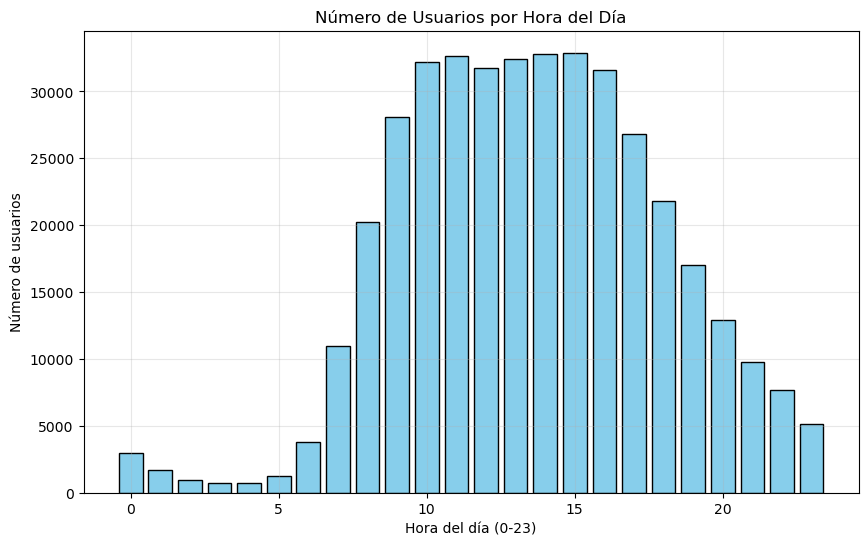

In [29]:
# Análisis de pedidos por hora del día
clientes_por_hora = df_orders.groupby('order_hour_of_day')['user_id'].nunique()

# Visualización con gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(clientes_por_hora.index, clientes_por_hora.values, color='skyblue', edgecolor='black')
plt.title('Número de Usuarios por Hora del Día')
plt.xlabel('Hora del día (0-23)')
plt.ylabel('Número de usuarios')
plt.grid(True, alpha=0.3)
plt.show()

### Análisis del gráfico "Número de Usuarios por Hora del Día":
- El período en el que las ventas alcanzan su punto máximo es de 10 a 15 horas.
- El día de la semana con más compras es el domingo.
- La mayoría de los usuarios tarda 30 días en realizar una nueva compra.

### [A3] ¿En qué día de la semana las personas realizan compras?

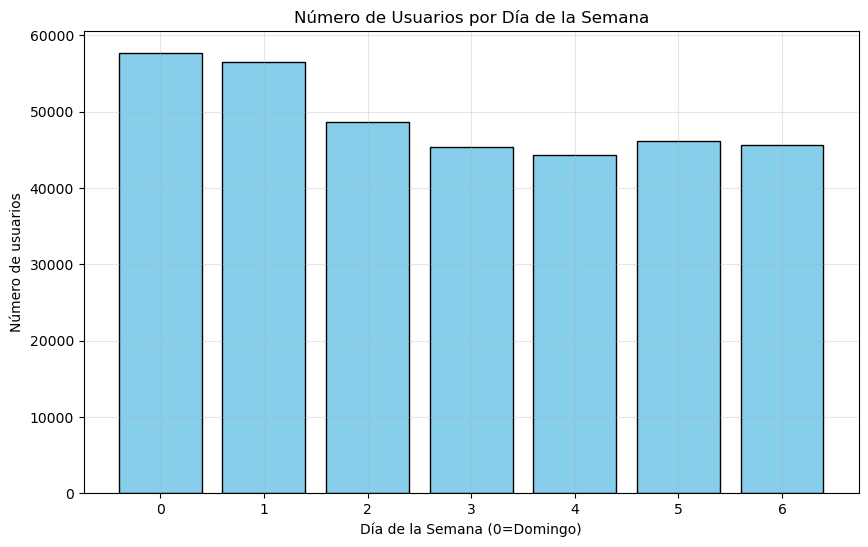

In [30]:
# Análisis de pedidos por día de la semana
clientes_por_dia_semana = df_orders.groupby('order_dow')['user_id'].nunique()

# Visualización con gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(clientes_por_dia_semana.index, clientes_por_dia_semana.values, color='skyblue', edgecolor='black')
plt.title('Número de Usuarios por Día de la Semana')
plt.xlabel('Día de la Semana (0=Domingo)')
plt.ylabel('Número de usuarios')
plt.grid(True, alpha=0.3)
plt.show()

### Análisis del gráfico "Número de Usuarios por Día de la Semana":
- El día de la semana con más compras es el domingo.

### [A4] ¿Cuánto tiempo esperan las personas para hacer otro pedido?

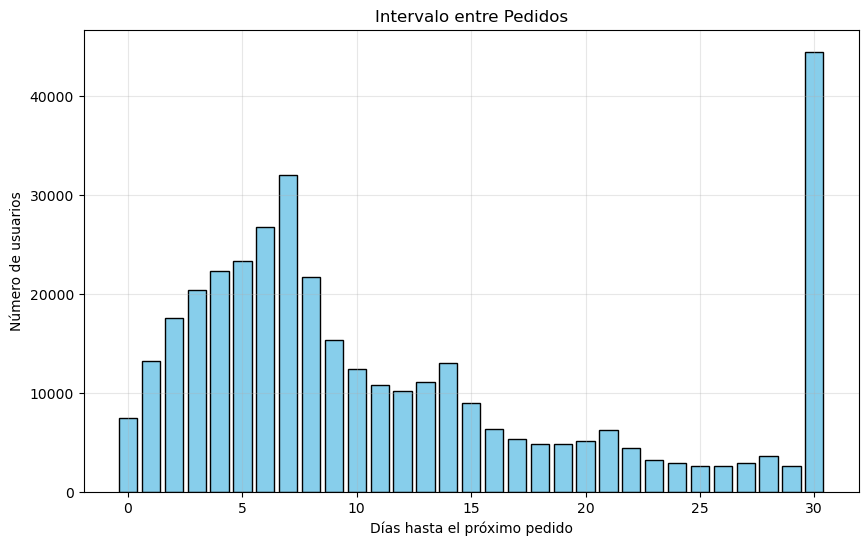

In [31]:
# Análisis del tiempo entre pedidos
espera_entre_compras = df_orders.groupby('days_since_prior_order')['user_id'].nunique()

# Visualización con gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(espera_entre_compras.index, espera_entre_compras.values, color='skyblue', edgecolor='black')
plt.title('Intervalo entre Pedidos')
plt.xlabel('Días hasta el próximo pedido')
plt.ylabel('Número de usuarios')
plt.grid(True, alpha=0.3)
plt.show()

## Conclusiones del Análisis Básico

1. **Patrones Temporales**
   - Pico de pedidos entre las 10h y las 15h.
   - Mayor volumen de pedidos los domingos.
   - La mayoría de los usuarios realiza un nuevo pedido en 30 días.

2. **Insights Operacionales**
   - Necesidad de mayor capacidad operativa en horario pico.
   - Planificación especial para domingos.
   - Oportunidad para incentivar recompras antes de los 30 días.

## B. Análisis Intermedio

### 1. Comparación de pedidos entre miércoles y sábados

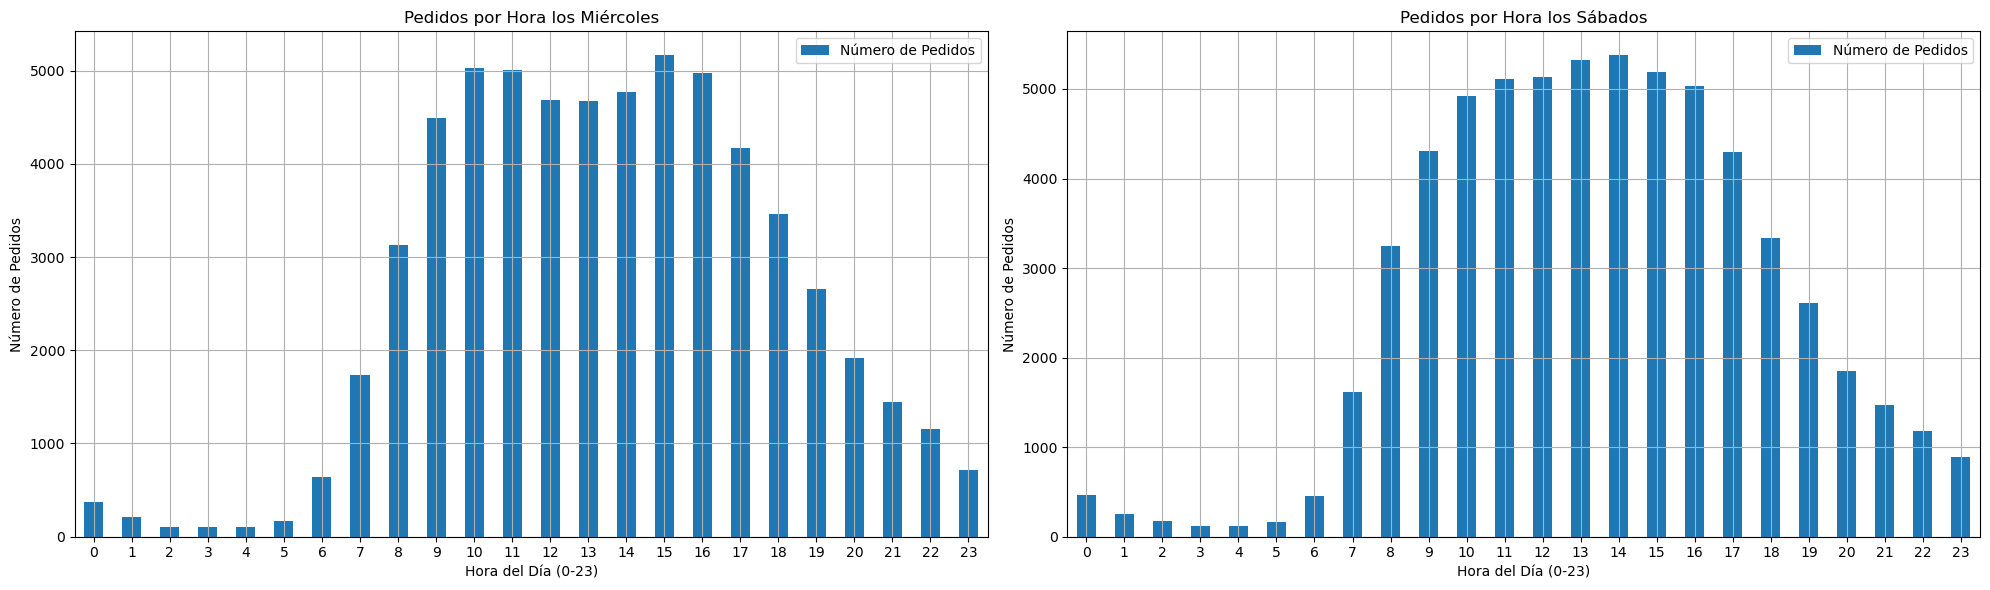

In [32]:
# Filtrar datos para miércoles (order_dow = 3)
miercoles_orders = df_orders[df_orders['order_dow'] == 3]
miercoles_contador_por_hora = miercoles_orders.groupby('order_hour_of_day')['order_id'].count()

# Filtrar datos para sábados (order_dow = 6)
sabado_orders = df_orders[df_orders['order_dow'] == 6]
sabado_contador_por_hora = sabado_orders.groupby('order_hour_of_day')['order_id'].count()

# Crear gráficos comparativos
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de miércoles
df_miercoles = pd.DataFrame({'Hora del día': miercoles_contador_por_hora.index, 
                             'Número de Pedidos': miercoles_contador_por_hora.values})
df_miercoles.plot(ax=ax[0], x='Hora del día', y='Número de Pedidos',
                  title='Pedidos por Hora los Miércoles',
                  kind='bar', xlabel='Hora del Día (0-23)',
                  ylabel='Número de Pedidos', grid=True)
ax[0].set_xticklabels(df_miercoles['Hora del día'], rotation=0)

# Gráfico de sábados
df_sabado = pd.DataFrame({'Hora del día': sabado_contador_por_hora.index,
                          'Número de Pedidos': sabado_contador_por_hora.values})
df_sabado.plot(ax=ax[1], x='Hora del día', y='Número de Pedidos',
               title='Pedidos por Hora los Sábados',
               kind='bar', xlabel='Hora del Día (0-23)',
               ylabel='Número de Pedidos', grid=True)
ax[1].set_xticklabels(df_sabado['Hora del día'], rotation=0)

plt.tight_layout()
plt.show()


### Análisis Comparativo Miércoles vs Sábado
- Miércoles: el pico de pedidos es más pronunciado durante el horario comercial.
- Sábados: la distribución es más uniforme a lo largo del día.
- La diferencia refleja distintos patrones de comportamiento entre días laborables y fines de semana.

### ¿Cuál es la distribución del número de pedidos por cliente?

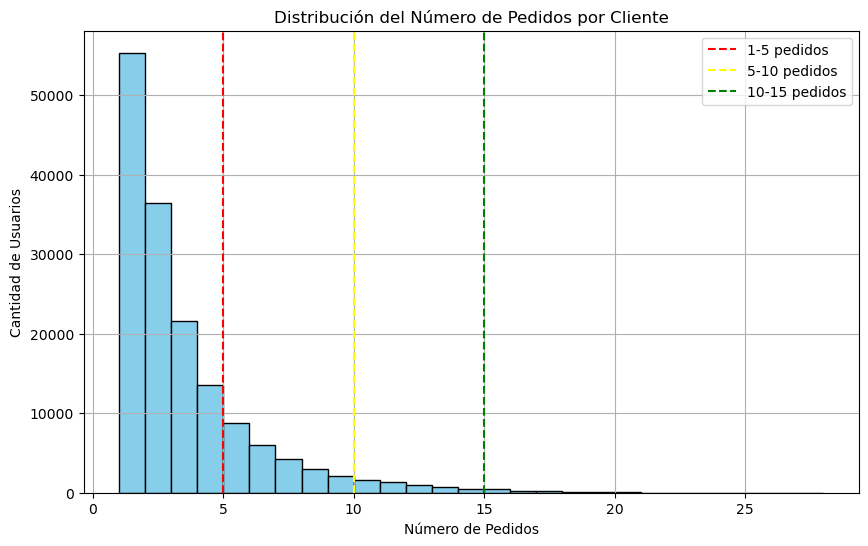

In [33]:
# Análisis de la distribución de pedidos por cliente
conteo_pedidos_por_cliente = df_orders.groupby('user_id').size()

# Visualización de la distribución
plt.figure(figsize=(10, 6))
plt.hist(conteo_pedidos_por_cliente, bins=range(1, conteo_pedidos_por_cliente.max()+1), 
         color='skyblue', edgecolor='black')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.axvline(x=5, color='red', linestyle='--', label='1-5 pedidos')
plt.axvline(x=10, color='yellow', linestyle='--', label='5-10 pedidos')
plt.axvline(x=15, color='green', linestyle='--', label='10-15 pedidos')
plt.legend()
plt.show()


### Análisis del gráfico "Distribución del Número de Pedidos por Cliente":
- Los clientes con un solo pedido representan la mayor categoría individual.
- La mayoría de los clientes realiza entre 1 y 5 pedidos.
- Existe una caída progresiva en la cantidad de clientes a medida que el número de pedidos aumenta.


### ¿Cuáles son los 20 productos más populares? Muestra los IDs y nombres

In [34]:
# Análisis de los 20 productos más frecuentes
conteo_productos = df_order_products['product_id'].value_counts()
conteo_productos_df = pd.DataFrame({'product_id': conteo_productos.index, 
                                   'order_count': conteo_productos.values})
merged_data = pd.merge(conteo_productos_df, df_products, on='product_id')
mas_vendidos = merged_data.sort_values(by='order_count', ascending=False).head(20)

print('20 Productos Más Vendidos:')
print(mas_vendidos[['product_id', 'product_name', 'order_count']])

20 Productos Más Vendidos:
    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204        Organic Fuji Apple        12544
1

## Conclusiones del Análisis Intermedio

1. **Patrones de Compra**
   - La mayoría de los clientes realiza entre 1-5 pedidos
   - Descenso pronunciado después de 5 pedidos
   - Pequeño grupo de clientes altamente activos (>15 pedidos)

2. **Productos Populares**
   - Los productos orgánicos dominan el ranking
   - Frutas y vegetales son las categorías más frecuentes
   - Los plátanos lideran en número de pedidos

3. **Perspectivas para el Negocio**
   - Oportunidad de retención después de las primeras compras
   - Potencial para estrategias específicas en diferentes días
   - Enfoque en productos orgánicos como diferenciador

## C. Análisis Avanzado

### 1. Distribución de artículos por pedido

### ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Estadísticas de Artículos por Pedido:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


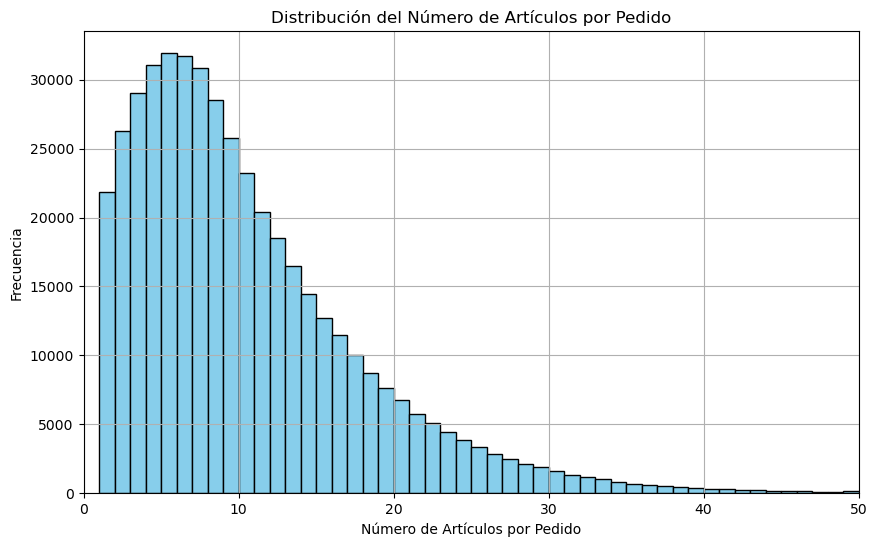

In [35]:
# Conteo de artículos por pedido
conteo_articulos = df_order_products.groupby('order_id').size()

# Estadísticas descriptivas
print('Estadísticas de Artículos por Pedido:')
print(conteo_articulos.describe())

# Visualización de la distribución
plt.figure(figsize=(10, 6))
plt.hist(conteo_articulos, bins=range(1, 51), edgecolor='black', color='skyblue')
plt.title('Distribución del Número de Artículos por Pedido')
plt.xlabel('Número de Artículos por Pedido')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xlim(0, 50)
plt.show()


### Análisis de la Distribución de Artículos
- Promedio de 10 artículos por pedido
- El 50% de los pedidos tienen entre 5 y 14 artículos
- Máximo de 127 artículos en un solo pedido

### ¿Cuáles son los 20 principales artículos más frecuentemente incluidos en pedidos repetidos? Muestra los IDs y nombres.

In [36]:
# Análisis de productos en pedidos repetidos
articulos_reordenados = df_order_products[df_order_products['reordered'] == 1]
conteo_reordenados = articulos_reordenados.groupby('product_id').size()
df_reordenados = pd.DataFrame({'product_id': conteo_reordenados.index, 
                               'reorder_contagem': conteo_reordenados.values})
df_merged = pd.merge(df_reordenados, df_products, on='product_id')
df_ordenado = df_merged.sort_values(by='reorder_contagem', 
                                    ascending=False).head(20)

print('20 Productos Más Recomprados:')
print(df_ordenado[['product_id', 'product_name', 'reorder_contagem']])


20 Productos Más Recomprados:
       product_id              product_name  reorder_contagem
18104       24852                    Banana             55763
9528        13176    Bag of Organic Bananas             44450
15368       21137      Organic Strawberries             28639
15936       21903      Organic Baby Spinach             26233
34407       47209      Organic Hass Avocado             23629
34828       47766           Organic Avocado             18743
20285       27845        Organic Whole Milk             16251
34725       47626               Large Lemon             15044
20375       27966       Organic Raspberries             14748
12193       16797              Strawberries             13945
19088       26209                     Limes             13327
16700       22935      Organic Yellow Onion             11145
18186       24964            Organic Garlic             10411
32792       45007          Organic Zucchini             10076
36219       49683            Cucumber Ki

### Análisis de los Productos Más Recomprados
- Los plátanos (tanto orgánicos como convencionales) lideran con gran margen
- Los productos orgánicos dominan la lista, ocupando 13 de las 20 posiciones
- Frutas y vegetales son las categorías más representadas
- El patrón sugiere un enfoque en productos frescos y saludables
- Las cantidades de recompra son significativas, oscilando entre 8.389 y 55.763 pedidos

### [C3] Para cada producto, ¿qué porcentaje de todos sus pedidos son repetidos?

In [37]:
# Análisis de la proporción de recompra por producto
reorder_porcentaje = df_order_products.groupby('product_id')['reordered'].mean().reset_index()
reorder_porcentaje.rename(columns={'reordered': 'reorder_ratio'}, inplace=True)
productos_repetidos = pd.merge(reorder_porcentaje, df_products, on='product_id')
productos_repetidos = productos_repetidos.sort_values(by='reorder_ratio', ascending=False)

print('\nProductos con Mayor Tasa de Recompra:')
print(productos_repetidos[['product_id', 'product_name', 'reorder_ratio']].head(20))



Productos con Mayor Tasa de Recompra:
       product_id                                       product_name  \
13453       14721                            Bone Strength Take Care   
19195       20949                           Vanilla Sandwich Cookies   
6136         6723                                   Palmiers- Petite   
6144         6732                  Naturally Sparkling Mineral Water   
41319       45088  California Dill Pollen & Garlic Goat Cheese & ...   
41310       45078                                       Pomegranatea   
19258       21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans   
19248       21005                        Peanut Butter Pie Ice Cream   
32273       35192                         Chocolate Soy Milk Singles   
32277       35197  Mocha Chocolate Chip  Organic Non-Dairy Frozen...   
6211         6810                        Raspberry Goji Paleo Prints   
41274       45040                                 Head Lock Mega Gel   
41269       45035        

### Análisis de las Tasas de Recompra
- 20 productos presentan una tasa de recompra del 100%
- Lista más diversa, incluyendo:
  - Suplementos (Bone Strength)
  - Productos de conveniencia (Cookies, Baking Mix)
  - Productos específicos (Dental Tape, Hair Color)
  - Alimentos especiales (Non-Dairy, Sugar Free)
- Son productos más nicho en comparación con los más recomprados en volumen
- Indica una fuerte fidelización en categorías específicas

# Conclusión general del proyecto:

ResolvÍ separar mis conclusiones en temas, y quedaron de la siguiente manera:

## Principales Descubrimientos

1. **Patrones Temporales**
   - Pico de pedidos entre las 10h y las 15h
   - Mayor volumen los domingos
   - Patrones distintos entre días hábiles y fines de semana
   - La mayoría de los usuarios regresa en 30 días

2. **Comportamiento de Compra**
   - Promedio de 10 artículos por pedido
   - La mayoría de los clientes realiza entre 1-5 pedidos
   - Pedidos concentrados entre 5-14 artículos
   - Pequeño grupo de clientes altamente activos

3. **Productos y Categorías**
   - Los productos orgánicos dominan las ventas
   - Los plátanos son el artículo más vendido
   - Los productos frescos lideran en volumen
   - Nichos específicos con alta fidelización


## Recomendaciones Estratégicas

1. **Operaciones**
   - Optimizar la capacidad para horarios pico
   - Planificación especial para los domingos
   - Dimensionar el equipo según los patrones semanales

2. **Marketing**
   - Desarrollar un programa de fidelización
   - Enfoque en retención tras las primeras compras
   - Promociones específicas para productos orgánicos
   - Estrategias diferenciadas para días hábiles y fines de semana

3. **Producto**
   - Mantener el enfoque en productos frescos y orgánicos
   - Desarrollar ofertas para nichos específicos
   - Considerar cestas básicas prearmadas
   - Garantizar la disponibilidad de los productos más recomprados


# ¡Gracias por su atención hasta aquí! ¡Espero que esto pueda iluminar nuestros caminos en el mundo de los datos!